In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2022.csv')
#=====================================================================
data = data[data.nuts2_name == 'THESSALY']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN mosq regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Greece/Thessaly/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, dropna=True)

In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 100, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 9064.02930 | Val Loss: 20738.65137 | Train Acc: 51.804| Val Acc: 63.358
Epoch 002: | Train Loss: 9040.76885 | Val Loss: 20717.50635 | Train Acc: 51.663| Val Acc: 63.358
Epoch 003: | Train Loss: 8996.63730 | Val Loss: 20654.67236 | Train Acc: 51.526| Val Acc: 63.152
Epoch 004: | Train Loss: 8968.77188 | Val Loss: 20556.17236 | Train Acc: 51.420| Val Acc: 62.938
Epoch 005: | Train Loss: 8919.03174 | Val Loss: 20427.97656 | Train Acc: 51.244| Val Acc: 62.662
Epoch 006: | Train Loss: 8864.02715 | Val Loss: 20284.80127 | Train Acc: 51.142| Val Acc: 62.322
Epoch 007: | Train Loss: 8814.25596 | Val Loss: 20128.89404 | Train Acc: 50.936| Val Acc: 61.983
Epoch 008: | Train Loss: 8764.04385 | Val Loss: 19987.75586 | Train Acc: 50.858| Val Acc: 61.722
Epoch 009: | Train Loss: 8711.14473 | Val Loss: 19875.26611 | Train Acc: 50.816| Val Acc: 61.527
Epoch 010: | Train Loss: 8670.37979 | Val Loss: 19804.31055 | Train Acc: 50.668| Val Acc: 61.394
Epoch 011: | Train Loss: 8614.

Epoch 088: | Train Loss: 5386.26689 | Val Loss: 16196.19580 | Train Acc: 41.607| Val Acc: 56.213
Epoch 089: | Train Loss: 5258.06455 | Val Loss: 16098.56738 | Train Acc: 40.966| Val Acc: 56.246
Epoch 090: | Train Loss: 5290.05088 | Val Loss: 16254.30127 | Train Acc: 41.094| Val Acc: 56.465
Epoch 091: | Train Loss: 5217.81680 | Val Loss: 16260.40137 | Train Acc: 40.967| Val Acc: 56.443
Epoch 092: | Train Loss: 5149.49775 | Val Loss: 16006.46582 | Train Acc: 40.637| Val Acc: 56.099
Epoch 093: | Train Loss: 5118.45469 | Val Loss: 16217.71777 | Train Acc: 41.031| Val Acc: 56.086
Epoch 094: | Train Loss: 5015.12349 | Val Loss: 16294.01025 | Train Acc: 40.096| Val Acc: 55.882
Epoch 095: | Train Loss: 5002.68750 | Val Loss: 16269.93604 | Train Acc: 39.677| Val Acc: 55.736
Epoch 096: | Train Loss: 4991.22847 | Val Loss: 15874.93994 | Train Acc: 40.053| Val Acc: 55.462
Epoch 097: | Train Loss: 4924.65757 | Val Loss: 15735.52979 | Train Acc: 40.012| Val Acc: 55.685
Epoch 098: | Train Loss: 4718.

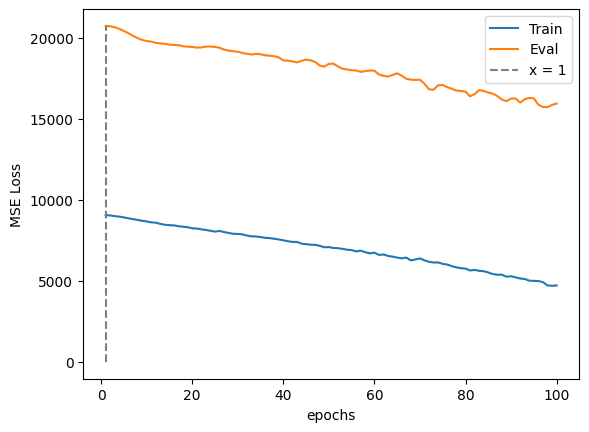

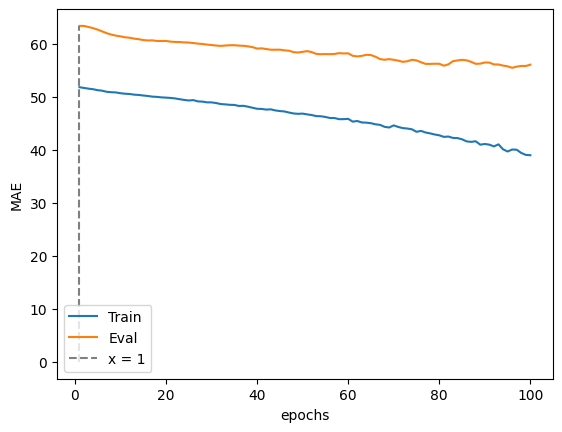

MAE on train set:  39.0265780730897
min prediction: 0
max prediction: 108

MAE on test set:  53.42857142857143
Error <= 30: 56.46 %
min prediction: 0
max prediction: 100


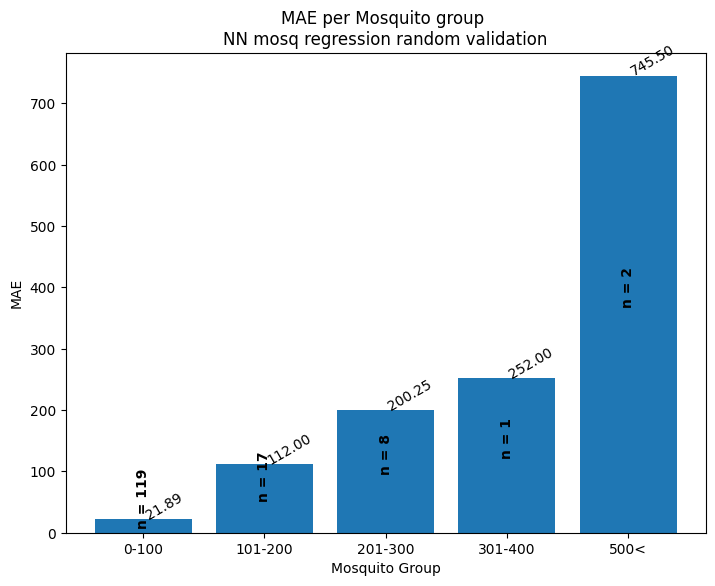

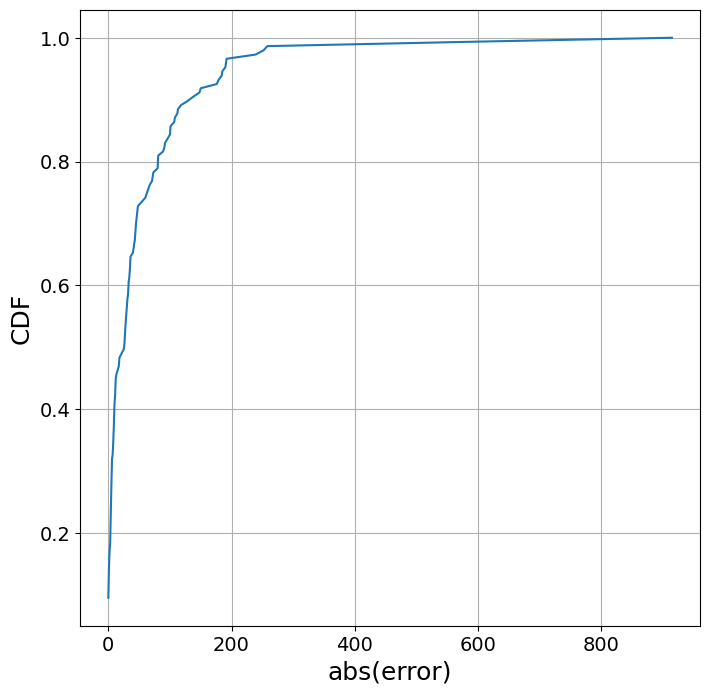

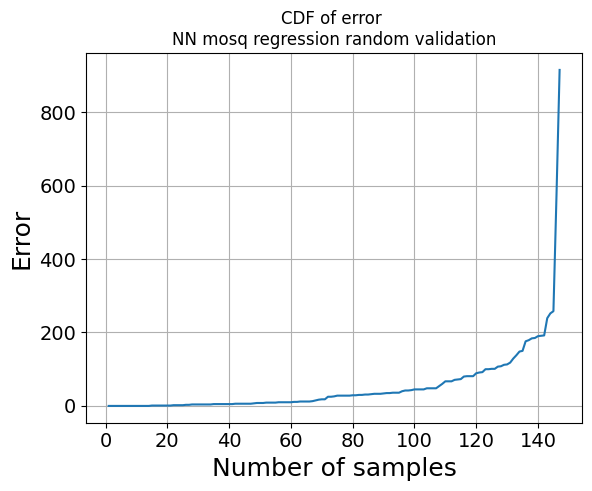

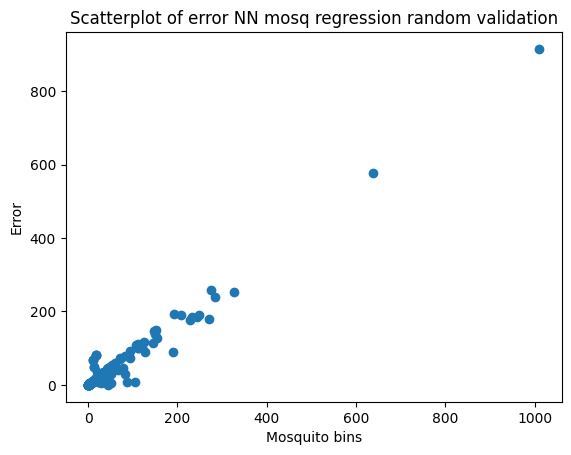

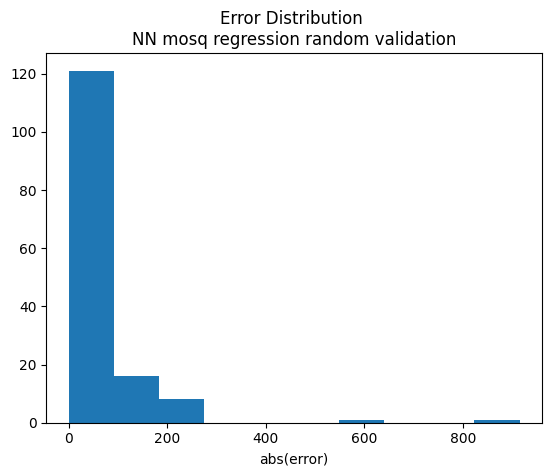

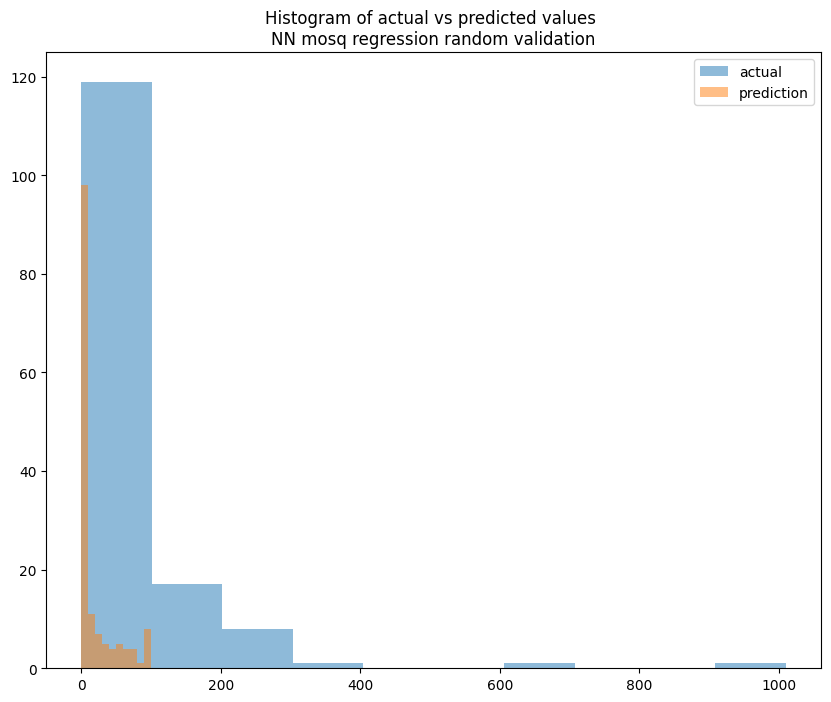

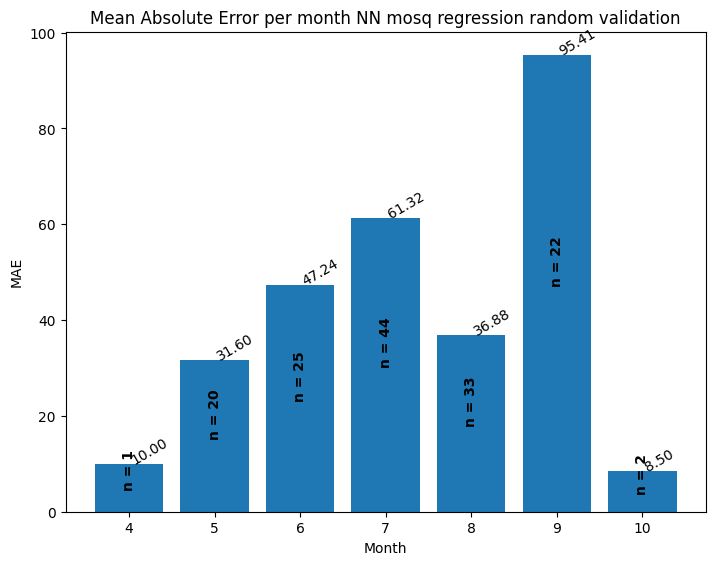

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 8409.83219 | Val Loss: 26385.07031 | Train Acc: 52.400| Val Acc: 67.784
Epoch 002: | Train Loss: 8374.93018 | Val Loss: 26311.25000 | Train Acc: 52.269| Val Acc: 67.689
Epoch 003: | Train Loss: 8335.39429 | Val Loss: 26215.21289 | Train Acc: 52.116| Val Acc: 67.500
Epoch 004: | Train Loss: 8284.73910 | Val Loss: 26100.49023 | Train Acc: 51.943| Val Acc: 67.284
Epoch 005: | Train Loss: 8263.56966 | Val Loss: 25970.95312 | Train Acc: 51.878| Val Acc: 67.189
Epoch 006: | Train Loss: 8201.08171 | Val Loss: 25864.51758 | Train Acc: 51.722| Val Acc: 66.973
Epoch 007: | Train Loss: 8148.56901 | Val Loss: 25741.76562 | Train Acc: 51.579| Val Acc: 66.824
Epoch 008: | Train Loss: 8080.93880 | Val Loss: 25610.95312 | Train Acc: 51.438| Val Acc: 66.676
Epoch 009: | Train Loss: 8066.04492 | Val Loss: 25535.77930 | Train Acc: 51.331| Val Acc: 66.541
Epoch 010: | Train Loss: 7982.45215 | Val Loss: 25470.60156 | Train Acc: 51.152| Val Acc: 66.419
Epoch 011: | Train Loss: 7979.

Epoch 089: | Train Loss: 3952.22587 | Val Loss: 21715.73633 | Train Acc: 37.832| Val Acc: 59.135
Epoch 090: | Train Loss: 3975.53809 | Val Loss: 21498.59766 | Train Acc: 37.795| Val Acc: 58.311
Epoch 091: | Train Loss: 3940.86129 | Val Loss: 21033.36914 | Train Acc: 37.412| Val Acc: 57.365
Epoch 092: | Train Loss: 3858.59147 | Val Loss: 20624.00977 | Train Acc: 37.404| Val Acc: 56.770
Epoch 093: | Train Loss: 3890.36654 | Val Loss: 20819.82031 | Train Acc: 37.137| Val Acc: 57.446
Epoch 094: | Train Loss: 3782.11068 | Val Loss: 21071.23047 | Train Acc: 36.876| Val Acc: 58.284
Epoch 095: | Train Loss: 3652.74227 | Val Loss: 20816.05664 | Train Acc: 36.420| Val Acc: 57.932
Epoch 096: | Train Loss: 3549.01770 | Val Loss: 20852.93359 | Train Acc: 35.857| Val Acc: 57.324
Epoch 097: | Train Loss: 3584.54964 | Val Loss: 21000.09766 | Train Acc: 36.010| Val Acc: 57.365
Epoch 098: | Train Loss: 3446.53723 | Val Loss: 20461.60547 | Train Acc: 35.339| Val Acc: 56.676
Epoch 099: | Train Loss: 3526.

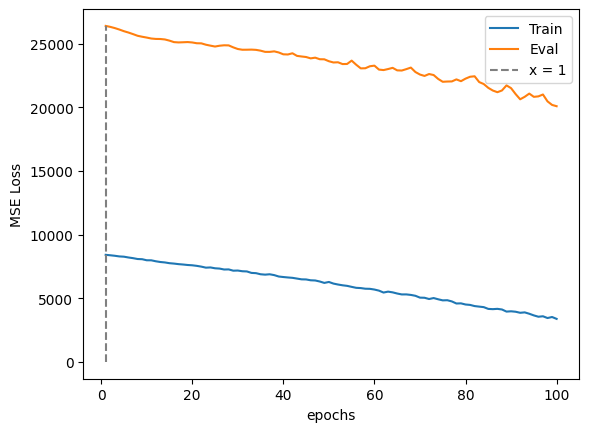

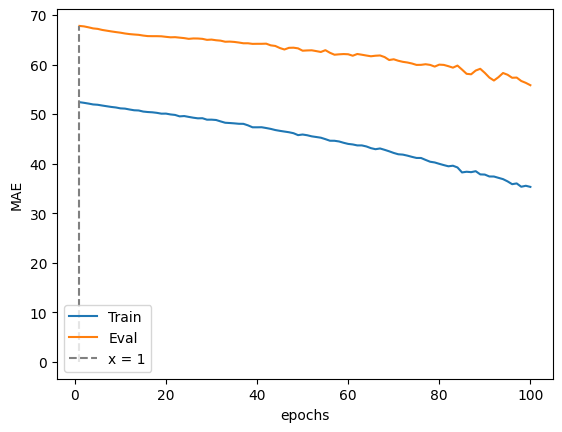

Epoch 001: | Train Loss: 9000.49113 | Val Loss: 55152.54297 | Train Acc: 53.724| Val Acc: 79.662
Epoch 002: | Train Loss: 8964.09814 | Val Loss: 55092.35547 | Train Acc: 53.618| Val Acc: 79.595
Epoch 003: | Train Loss: 8921.06177 | Val Loss: 54978.41406 | Train Acc: 53.444| Val Acc: 79.459
Epoch 004: | Train Loss: 8875.07959 | Val Loss: 54862.67188 | Train Acc: 53.329| Val Acc: 79.203
Epoch 005: | Train Loss: 8834.97795 | Val Loss: 54737.66406 | Train Acc: 53.208| Val Acc: 78.959
Epoch 006: | Train Loss: 8775.22127 | Val Loss: 54602.64453 | Train Acc: 53.068| Val Acc: 78.716
Epoch 007: | Train Loss: 8739.76343 | Val Loss: 54420.42578 | Train Acc: 52.934| Val Acc: 78.527
Epoch 008: | Train Loss: 8684.70516 | Val Loss: 54276.88672 | Train Acc: 52.789| Val Acc: 78.432
Epoch 009: | Train Loss: 8614.84546 | Val Loss: 54122.53516 | Train Acc: 52.636| Val Acc: 78.230
Epoch 010: | Train Loss: 8580.55363 | Val Loss: 54002.35938 | Train Acc: 52.528| Val Acc: 78.054
Epoch 011: | Train Loss: 8546.

Epoch 089: | Train Loss: 4393.31340 | Val Loss: 46738.37109 | Train Acc: 39.052| Val Acc: 72.797
Epoch 090: | Train Loss: 4343.17704 | Val Loss: 46543.08203 | Train Acc: 39.224| Val Acc: 72.770
Epoch 091: | Train Loss: 4427.53507 | Val Loss: 46354.96094 | Train Acc: 39.325| Val Acc: 72.216
Epoch 092: | Train Loss: 4277.29248 | Val Loss: 46277.15234 | Train Acc: 38.694| Val Acc: 71.865
Epoch 093: | Train Loss: 4237.42818 | Val Loss: 45899.92188 | Train Acc: 38.382| Val Acc: 71.081
Epoch 094: | Train Loss: 4343.85494 | Val Loss: 45569.51953 | Train Acc: 38.478| Val Acc: 70.824
Epoch 095: | Train Loss: 4076.93717 | Val Loss: 45609.67969 | Train Acc: 37.859| Val Acc: 70.811
Epoch 096: | Train Loss: 4099.97384 | Val Loss: 45574.86719 | Train Acc: 37.732| Val Acc: 71.014
Epoch 097: | Train Loss: 4164.38196 | Val Loss: 45883.58594 | Train Acc: 37.778| Val Acc: 71.365
Epoch 098: | Train Loss: 3993.23627 | Val Loss: 45736.92578 | Train Acc: 37.295| Val Acc: 71.135
Epoch 099: | Train Loss: 3943.

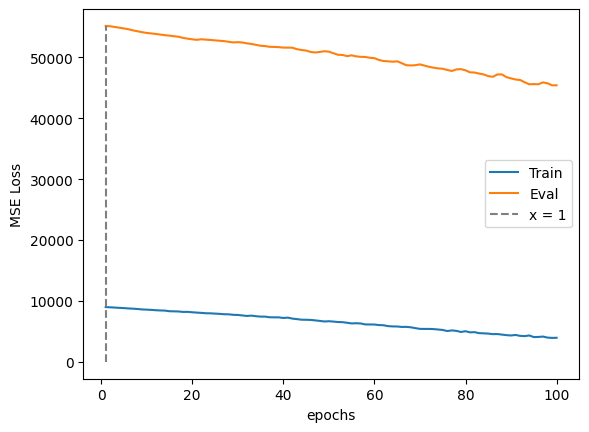

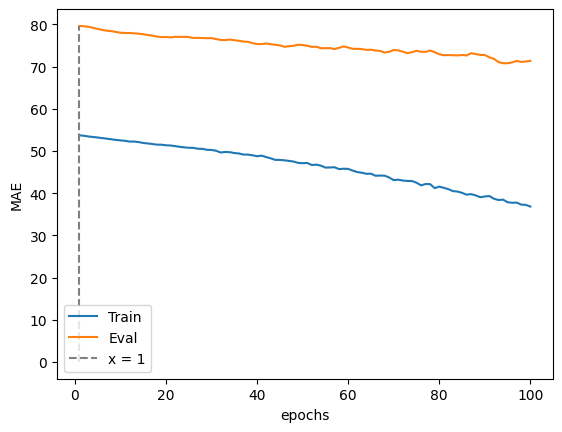

Epoch 001: | Train Loss: 8947.51172 | Val Loss: 18778.10547 | Train Acc: 53.918| Val Acc: 66.757
Epoch 002: | Train Loss: 8898.63802 | Val Loss: 18727.91992 | Train Acc: 53.733| Val Acc: 66.649
Epoch 003: | Train Loss: 8863.90837 | Val Loss: 18616.05664 | Train Acc: 53.576| Val Acc: 66.297
Epoch 004: | Train Loss: 8825.85750 | Val Loss: 18484.13672 | Train Acc: 53.482| Val Acc: 65.946
Epoch 005: | Train Loss: 8789.90275 | Val Loss: 18352.01367 | Train Acc: 53.447| Val Acc: 65.541
Epoch 006: | Train Loss: 8718.97168 | Val Loss: 18189.65234 | Train Acc: 53.234| Val Acc: 65.041
Epoch 007: | Train Loss: 8676.39193 | Val Loss: 18033.17969 | Train Acc: 53.127| Val Acc: 64.676
Epoch 008: | Train Loss: 8603.97184 | Val Loss: 17904.80859 | Train Acc: 52.908| Val Acc: 64.324
Epoch 009: | Train Loss: 8569.49251 | Val Loss: 17831.60156 | Train Acc: 52.875| Val Acc: 64.176
Epoch 010: | Train Loss: 8512.55452 | Val Loss: 17750.74414 | Train Acc: 52.729| Val Acc: 64.027
Epoch 011: | Train Loss: 8468.

Epoch 088: | Train Loss: 4578.87964 | Val Loss: 12940.96680 | Train Acc: 39.977| Val Acc: 55.473
Epoch 089: | Train Loss: 4481.21488 | Val Loss: 12849.28125 | Train Acc: 39.748| Val Acc: 54.946
Epoch 090: | Train Loss: 4478.39811 | Val Loss: 12769.04004 | Train Acc: 39.699| Val Acc: 54.676
Epoch 091: | Train Loss: 4459.55448 | Val Loss: 12703.74023 | Train Acc: 39.472| Val Acc: 54.405
Epoch 092: | Train Loss: 4343.52861 | Val Loss: 12477.33887 | Train Acc: 38.734| Val Acc: 53.824
Epoch 093: | Train Loss: 4187.79476 | Val Loss: 12328.45605 | Train Acc: 38.630| Val Acc: 53.473
Epoch 094: | Train Loss: 4191.39278 | Val Loss: 12110.99512 | Train Acc: 38.433| Val Acc: 53.986
Epoch 095: | Train Loss: 4278.10510 | Val Loss: 12139.19043 | Train Acc: 39.009| Val Acc: 54.405
Epoch 096: | Train Loss: 4166.15926 | Val Loss: 12274.35645 | Train Acc: 38.868| Val Acc: 54.149
Epoch 097: | Train Loss: 4035.33012 | Val Loss: 12385.88672 | Train Acc: 37.966| Val Acc: 53.689
Epoch 098: | Train Loss: 4027.

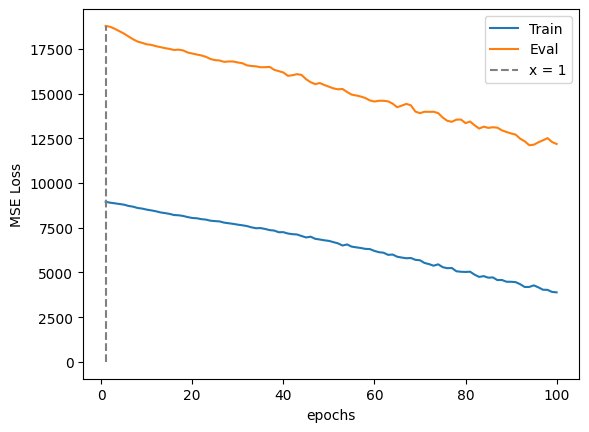

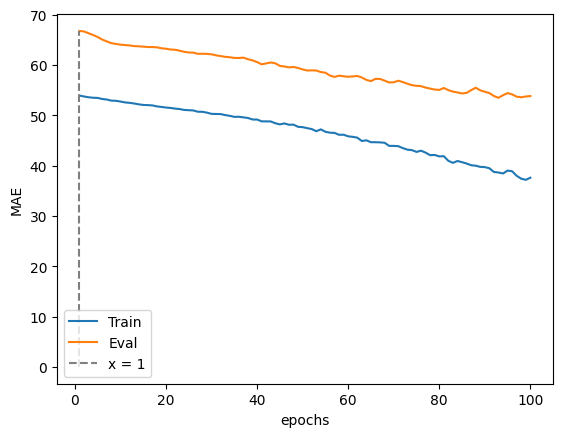

Epoch 001: | Train Loss: 8015.10579 | Val Loss: 35882.27344 | Train Acc: 50.948| Val Acc: 81.257
Epoch 002: | Train Loss: 8000.79907 | Val Loss: 35841.19531 | Train Acc: 50.771| Val Acc: 81.216
Epoch 003: | Train Loss: 7971.24154 | Val Loss: 35758.67578 | Train Acc: 50.705| Val Acc: 81.027
Epoch 004: | Train Loss: 7917.27271 | Val Loss: 35667.83594 | Train Acc: 50.518| Val Acc: 80.784
Epoch 005: | Train Loss: 7899.65552 | Val Loss: 35582.77734 | Train Acc: 50.443| Val Acc: 80.541
Epoch 006: | Train Loss: 7823.08944 | Val Loss: 35480.77344 | Train Acc: 50.244| Val Acc: 80.270
Epoch 007: | Train Loss: 7793.63363 | Val Loss: 35358.78906 | Train Acc: 50.117| Val Acc: 79.878
Epoch 008: | Train Loss: 7736.94019 | Val Loss: 35245.56250 | Train Acc: 49.950| Val Acc: 79.662
Epoch 009: | Train Loss: 7704.68132 | Val Loss: 35117.17969 | Train Acc: 49.788| Val Acc: 79.392
Epoch 010: | Train Loss: 7670.36206 | Val Loss: 35028.35156 | Train Acc: 49.713| Val Acc: 79.162
Epoch 011: | Train Loss: 7587.

Epoch 086: | Train Loss: 4013.47803 | Val Loss: 29426.27734 | Train Acc: 37.701| Val Acc: 69.392
Epoch 087: | Train Loss: 3757.46700 | Val Loss: 29598.39453 | Train Acc: 36.627| Val Acc: 69.541
Epoch 088: | Train Loss: 3741.27608 | Val Loss: 29632.50586 | Train Acc: 36.585| Val Acc: 69.757
Epoch 089: | Train Loss: 3807.67179 | Val Loss: 28956.79297 | Train Acc: 36.713| Val Acc: 69.054
Epoch 090: | Train Loss: 3816.26221 | Val Loss: 28442.19531 | Train Acc: 36.638| Val Acc: 68.095
Epoch 091: | Train Loss: 3819.26107 | Val Loss: 28145.46875 | Train Acc: 36.552| Val Acc: 67.838
Epoch 092: | Train Loss: 3618.14124 | Val Loss: 27808.77930 | Train Acc: 35.781| Val Acc: 67.730
Epoch 093: | Train Loss: 3556.36544 | Val Loss: 27815.06836 | Train Acc: 35.608| Val Acc: 67.622
Epoch 094: | Train Loss: 3537.15043 | Val Loss: 27909.33398 | Train Acc: 35.254| Val Acc: 67.378
Epoch 095: | Train Loss: 3514.65747 | Val Loss: 28094.68555 | Train Acc: 35.207| Val Acc: 67.743
Epoch 096: | Train Loss: 3454.

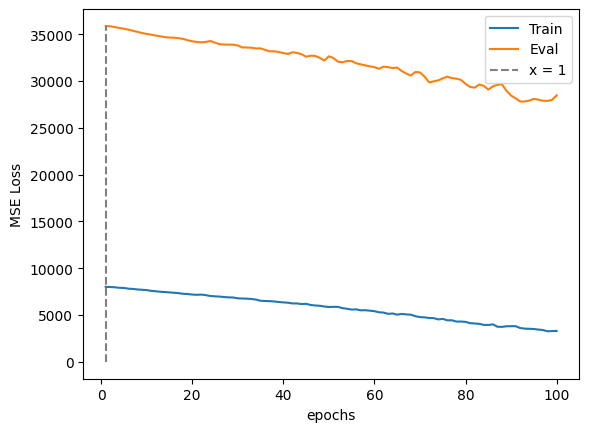

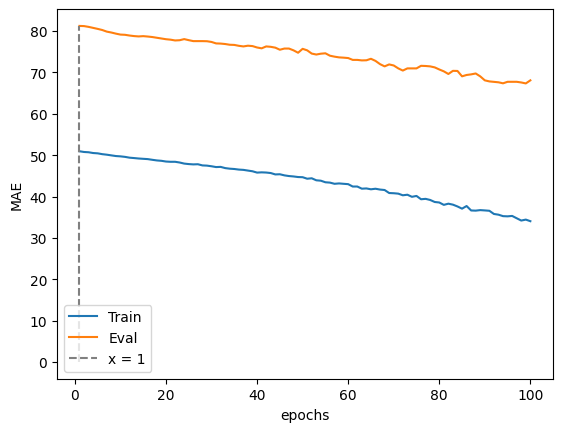

Epoch 001: | Train Loss: 8627.35588 | Val Loss: 17138.10547 | Train Acc: 52.954| Val Acc: 60.405
Epoch 002: | Train Loss: 8602.68327 | Val Loss: 17111.70703 | Train Acc: 52.879| Val Acc: 60.392
Epoch 003: | Train Loss: 8567.18311 | Val Loss: 17042.16406 | Train Acc: 52.755| Val Acc: 60.257
Epoch 004: | Train Loss: 8513.93612 | Val Loss: 16957.24414 | Train Acc: 52.542| Val Acc: 60.054
Epoch 005: | Train Loss: 8477.02311 | Val Loss: 16863.98047 | Train Acc: 52.452| Val Acc: 59.865
Epoch 006: | Train Loss: 8424.75602 | Val Loss: 16761.73828 | Train Acc: 52.346| Val Acc: 59.635
Epoch 007: | Train Loss: 8375.77262 | Val Loss: 16645.78125 | Train Acc: 52.115| Val Acc: 59.432
Epoch 008: | Train Loss: 8300.81348 | Val Loss: 16532.90820 | Train Acc: 51.983| Val Acc: 59.243
Epoch 009: | Train Loss: 8252.76457 | Val Loss: 16439.11523 | Train Acc: 51.847| Val Acc: 59.149
Epoch 010: | Train Loss: 8205.80444 | Val Loss: 16346.69434 | Train Acc: 51.783| Val Acc: 58.946
Epoch 011: | Train Loss: 8140.

Epoch 086: | Train Loss: 4373.64262 | Val Loss: 13433.99219 | Train Acc: 39.234| Val Acc: 50.554
Epoch 087: | Train Loss: 4437.14530 | Val Loss: 13200.98926 | Train Acc: 39.320| Val Acc: 50.081
Epoch 088: | Train Loss: 4347.77157 | Val Loss: 13120.95020 | Train Acc: 39.341| Val Acc: 50.095
Epoch 089: | Train Loss: 4192.70516 | Val Loss: 13319.71094 | Train Acc: 38.383| Val Acc: 50.486
Epoch 090: | Train Loss: 4161.08346 | Val Loss: 13121.56445 | Train Acc: 38.142| Val Acc: 50.189
Epoch 091: | Train Loss: 4104.94503 | Val Loss: 13128.74707 | Train Acc: 38.447| Val Acc: 50.405
Epoch 092: | Train Loss: 4233.13468 | Val Loss: 13090.49707 | Train Acc: 38.561| Val Acc: 50.392
Epoch 093: | Train Loss: 4051.74430 | Val Loss: 13068.92188 | Train Acc: 37.885| Val Acc: 50.527
Epoch 094: | Train Loss: 4034.33622 | Val Loss: 12905.99023 | Train Acc: 37.959| Val Acc: 50.162
Epoch 095: | Train Loss: 3934.22005 | Val Loss: 12908.13867 | Train Acc: 37.393| Val Acc: 50.054
Epoch 096: | Train Loss: 3893.

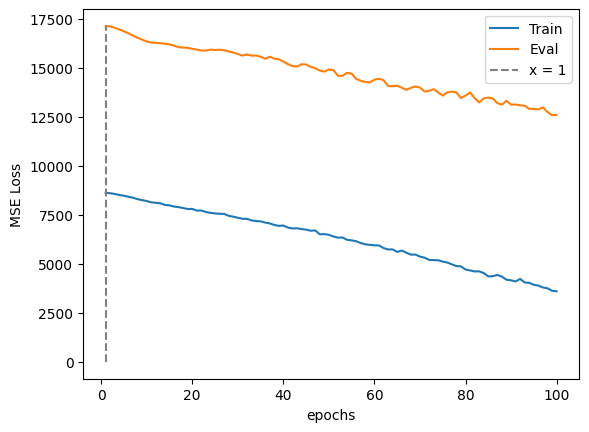

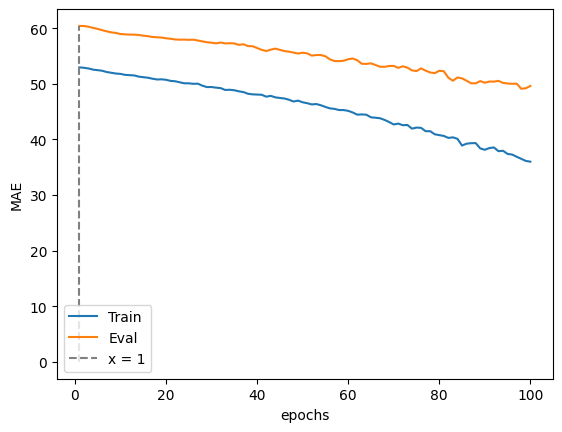

Epoch 001: | Train Loss: 9201.77474 | Val Loss: 13664.96191 | Train Acc: 54.466| Val Acc: 57.493
Epoch 002: | Train Loss: 9169.94653 | Val Loss: 13656.51270 | Train Acc: 54.391| Val Acc: 57.493
Epoch 003: | Train Loss: 9118.52165 | Val Loss: 13615.19336 | Train Acc: 54.185| Val Acc: 57.288
Epoch 004: | Train Loss: 9084.17310 | Val Loss: 13542.08691 | Train Acc: 54.082| Val Acc: 57.055
Epoch 005: | Train Loss: 9040.58073 | Val Loss: 13459.79297 | Train Acc: 53.931| Val Acc: 56.699
Epoch 006: | Train Loss: 8996.58643 | Val Loss: 13374.99609 | Train Acc: 53.859| Val Acc: 56.466
Epoch 007: | Train Loss: 8938.27791 | Val Loss: 13292.91406 | Train Acc: 53.695| Val Acc: 56.205
Epoch 008: | Train Loss: 8878.89909 | Val Loss: 13233.25488 | Train Acc: 53.583| Val Acc: 56.041
Epoch 009: | Train Loss: 8872.08333 | Val Loss: 13169.86426 | Train Acc: 53.500| Val Acc: 55.849
Epoch 010: | Train Loss: 8791.64103 | Val Loss: 13121.41797 | Train Acc: 53.376| Val Acc: 55.699
Epoch 011: | Train Loss: 8735.

Epoch 087: | Train Loss: 4802.65153 | Val Loss: 10917.97461 | Train Acc: 40.476| Val Acc: 47.342
Epoch 088: | Train Loss: 4775.87708 | Val Loss: 10654.47363 | Train Acc: 40.711| Val Acc: 46.616
Epoch 089: | Train Loss: 4720.26953 | Val Loss: 10693.77246 | Train Acc: 40.334| Val Acc: 46.644
Epoch 090: | Train Loss: 4753.67904 | Val Loss: 10890.73828 | Train Acc: 40.228| Val Acc: 46.849
Epoch 091: | Train Loss: 4564.38558 | Val Loss: 10868.43652 | Train Acc: 39.670| Val Acc: 46.767
Epoch 092: | Train Loss: 4590.15865 | Val Loss: 10768.75586 | Train Acc: 39.831| Val Acc: 46.370
Epoch 093: | Train Loss: 4552.53263 | Val Loss: 10561.33594 | Train Acc: 39.683| Val Acc: 45.753
Epoch 094: | Train Loss: 4365.52535 | Val Loss: 10495.58301 | Train Acc: 39.345| Val Acc: 45.890
Epoch 095: | Train Loss: 4432.88765 | Val Loss: 10828.94141 | Train Acc: 39.360| Val Acc: 46.671
Epoch 096: | Train Loss: 4421.17830 | Val Loss: 10837.02832 | Train Acc: 38.921| Val Acc: 46.562
Epoch 097: | Train Loss: 4269.

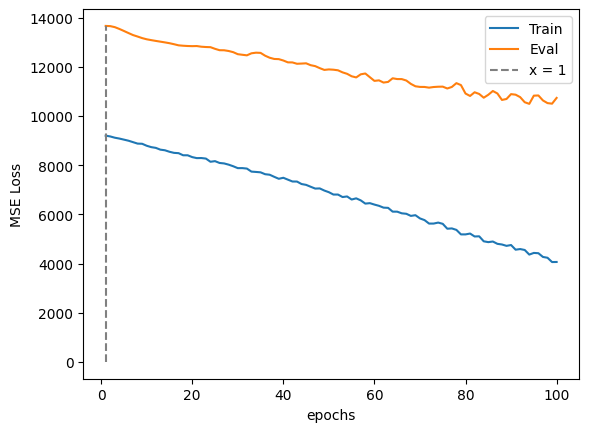

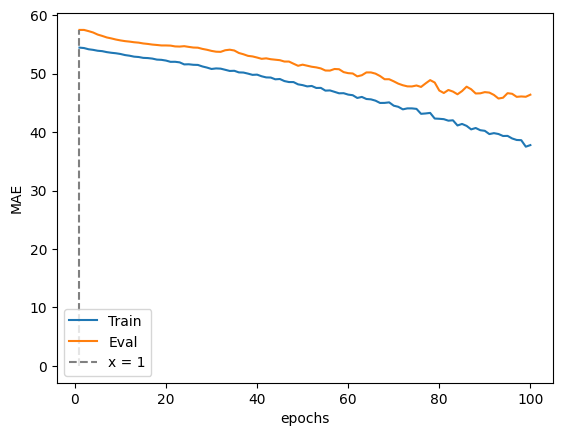

Epoch 001: | Train Loss: 8448.15674 | Val Loss: 26169.67969 | Train Acc: 50.820| Val Acc: 53.370
Epoch 002: | Train Loss: 8401.93416 | Val Loss: 26126.87500 | Train Acc: 50.674| Val Acc: 53.342
Epoch 003: | Train Loss: 8375.87760 | Val Loss: 26069.27148 | Train Acc: 50.545| Val Acc: 53.123
Epoch 004: | Train Loss: 8323.57560 | Val Loss: 25994.46875 | Train Acc: 50.384| Val Acc: 52.959
Epoch 005: | Train Loss: 8294.15186 | Val Loss: 25903.29883 | Train Acc: 50.221| Val Acc: 52.712
Epoch 006: | Train Loss: 8255.14518 | Val Loss: 25806.60938 | Train Acc: 50.149| Val Acc: 52.548
Epoch 007: | Train Loss: 8207.61239 | Val Loss: 25698.15430 | Train Acc: 49.999| Val Acc: 52.329
Epoch 008: | Train Loss: 8174.29199 | Val Loss: 25596.27148 | Train Acc: 49.858| Val Acc: 52.082
Epoch 009: | Train Loss: 8101.95630 | Val Loss: 25524.13477 | Train Acc: 49.714| Val Acc: 51.918
Epoch 010: | Train Loss: 8075.20874 | Val Loss: 25421.74023 | Train Acc: 49.623| Val Acc: 51.712
Epoch 011: | Train Loss: 8005.

Epoch 087: | Train Loss: 4268.01133 | Val Loss: 21834.74023 | Train Acc: 37.255| Val Acc: 44.479
Epoch 088: | Train Loss: 4131.83523 | Val Loss: 21748.47656 | Train Acc: 37.103| Val Acc: 44.370
Epoch 089: | Train Loss: 4090.23680 | Val Loss: 21613.50977 | Train Acc: 37.016| Val Acc: 44.082
Epoch 090: | Train Loss: 3992.17786 | Val Loss: 21460.87695 | Train Acc: 36.426| Val Acc: 43.836
Epoch 091: | Train Loss: 3860.94135 | Val Loss: 21432.02539 | Train Acc: 35.839| Val Acc: 43.616
Epoch 092: | Train Loss: 3806.45026 | Val Loss: 21348.05859 | Train Acc: 36.080| Val Acc: 43.630
Epoch 093: | Train Loss: 3811.61285 | Val Loss: 21321.94922 | Train Acc: 35.659| Val Acc: 43.849
Epoch 094: | Train Loss: 3784.32489 | Val Loss: 21225.62305 | Train Acc: 35.554| Val Acc: 43.438
Epoch 095: | Train Loss: 3668.07294 | Val Loss: 21330.02734 | Train Acc: 35.162| Val Acc: 43.397
Epoch 096: | Train Loss: 3751.36705 | Val Loss: 21391.88477 | Train Acc: 35.358| Val Acc: 43.589
Epoch 097: | Train Loss: 3660.

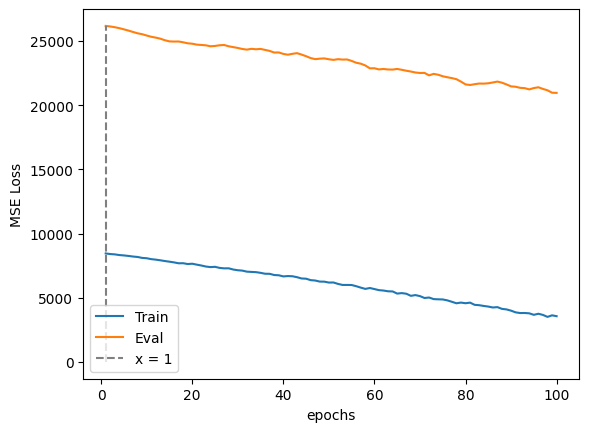

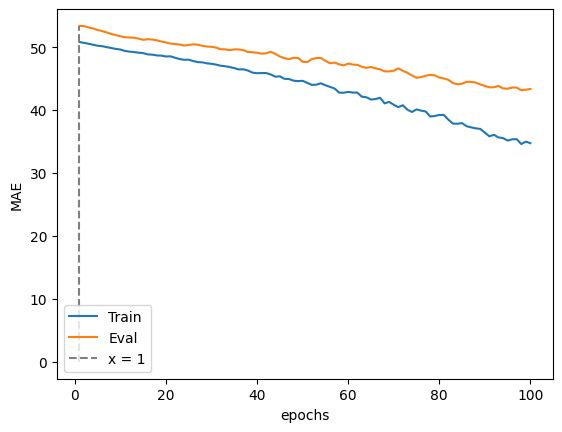

Epoch 001: | Train Loss: 8492.76009 | Val Loss: 17013.33984 | Train Acc: 50.665| Val Acc: 62.603
Epoch 002: | Train Loss: 8449.70117 | Val Loss: 16981.06250 | Train Acc: 50.580| Val Acc: 62.603
Epoch 003: | Train Loss: 8418.73934 | Val Loss: 16930.62305 | Train Acc: 50.417| Val Acc: 62.479
Epoch 004: | Train Loss: 8384.52913 | Val Loss: 16854.28711 | Train Acc: 50.288| Val Acc: 62.301
Epoch 005: | Train Loss: 8336.61670 | Val Loss: 16756.45117 | Train Acc: 50.136| Val Acc: 62.041
Epoch 006: | Train Loss: 8281.54639 | Val Loss: 16655.17969 | Train Acc: 49.990| Val Acc: 61.740
Epoch 007: | Train Loss: 8228.66732 | Val Loss: 16568.35352 | Train Acc: 49.826| Val Acc: 61.603
Epoch 008: | Train Loss: 8203.62939 | Val Loss: 16498.32227 | Train Acc: 49.767| Val Acc: 61.397
Epoch 009: | Train Loss: 8126.97257 | Val Loss: 16417.81250 | Train Acc: 49.505| Val Acc: 61.137
Epoch 010: | Train Loss: 8087.76074 | Val Loss: 16347.95020 | Train Acc: 49.489| Val Acc: 60.932
Epoch 011: | Train Loss: 8025.

Epoch 086: | Train Loss: 4174.25289 | Val Loss: 12689.82910 | Train Acc: 37.483| Val Acc: 48.630
Epoch 087: | Train Loss: 4008.64998 | Val Loss: 12770.96484 | Train Acc: 36.949| Val Acc: 48.630
Epoch 088: | Train Loss: 4095.21562 | Val Loss: 12603.14258 | Train Acc: 37.166| Val Acc: 48.425
Epoch 089: | Train Loss: 4061.32031 | Val Loss: 12348.18359 | Train Acc: 37.019| Val Acc: 47.822
Epoch 090: | Train Loss: 4028.03715 | Val Loss: 12223.90430 | Train Acc: 36.583| Val Acc: 47.548
Epoch 091: | Train Loss: 3946.21305 | Val Loss: 12245.90918 | Train Acc: 36.552| Val Acc: 47.260
Epoch 092: | Train Loss: 3826.46460 | Val Loss: 12208.44434 | Train Acc: 36.196| Val Acc: 47.315
Epoch 093: | Train Loss: 3771.18937 | Val Loss: 12054.84375 | Train Acc: 35.765| Val Acc: 46.781
Epoch 094: | Train Loss: 3723.62000 | Val Loss: 11909.06641 | Train Acc: 35.596| Val Acc: 46.370
Epoch 095: | Train Loss: 3594.44710 | Val Loss: 11825.97754 | Train Acc: 35.198| Val Acc: 46.507
Epoch 096: | Train Loss: 3635.

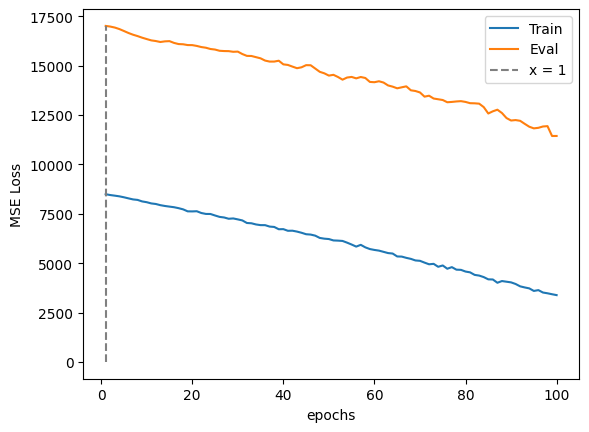

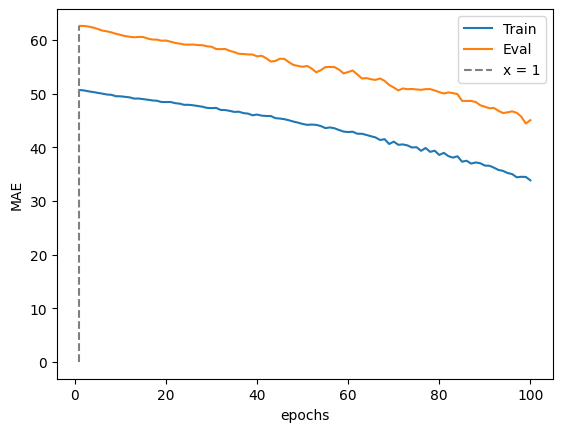

Epoch 001: | Train Loss: 8224.23157 | Val Loss: 58029.10938 | Train Acc: 50.463| Val Acc: 90.849
Epoch 002: | Train Loss: 8198.96061 | Val Loss: 57948.34766 | Train Acc: 50.302| Val Acc: 90.808
Epoch 003: | Train Loss: 8175.41142 | Val Loss: 57846.57031 | Train Acc: 50.189| Val Acc: 90.616
Epoch 004: | Train Loss: 8112.64547 | Val Loss: 57706.77344 | Train Acc: 49.981| Val Acc: 90.356
Epoch 005: | Train Loss: 8074.16703 | Val Loss: 57542.60938 | Train Acc: 49.809| Val Acc: 90.027
Epoch 006: | Train Loss: 8020.40971 | Val Loss: 57377.88672 | Train Acc: 49.711| Val Acc: 89.740
Epoch 007: | Train Loss: 7978.35315 | Val Loss: 57249.43359 | Train Acc: 49.555| Val Acc: 89.521
Epoch 008: | Train Loss: 7971.32996 | Val Loss: 57120.83203 | Train Acc: 49.509| Val Acc: 89.329
Epoch 009: | Train Loss: 7904.45402 | Val Loss: 56998.04688 | Train Acc: 49.345| Val Acc: 89.205
Epoch 010: | Train Loss: 7858.45386 | Val Loss: 56827.49609 | Train Acc: 49.204| Val Acc: 89.082
Epoch 011: | Train Loss: 7806.

Epoch 089: | Train Loss: 3942.94043 | Val Loss: 47733.50391 | Train Acc: 36.402| Val Acc: 79.329
Epoch 090: | Train Loss: 3901.07426 | Val Loss: 47468.07031 | Train Acc: 36.016| Val Acc: 78.795
Epoch 091: | Train Loss: 3850.31828 | Val Loss: 47634.03516 | Train Acc: 36.257| Val Acc: 79.151
Epoch 092: | Train Loss: 3918.84300 | Val Loss: 47689.35547 | Train Acc: 36.218| Val Acc: 79.137
Epoch 093: | Train Loss: 3735.49733 | Val Loss: 47343.47656 | Train Acc: 35.290| Val Acc: 78.425
Epoch 094: | Train Loss: 3690.43901 | Val Loss: 47201.68359 | Train Acc: 34.821| Val Acc: 78.247
Epoch 095: | Train Loss: 3669.86711 | Val Loss: 47021.99609 | Train Acc: 34.912| Val Acc: 78.671
Epoch 096: | Train Loss: 3477.96847 | Val Loss: 47182.66406 | Train Acc: 34.152| Val Acc: 79.219
Epoch 097: | Train Loss: 3524.25618 | Val Loss: 47094.90234 | Train Acc: 34.411| Val Acc: 79.397
Epoch 098: | Train Loss: 3520.39170 | Val Loss: 46925.77734 | Train Acc: 34.165| Val Acc: 78.945
Epoch 099: | Train Loss: 3533.

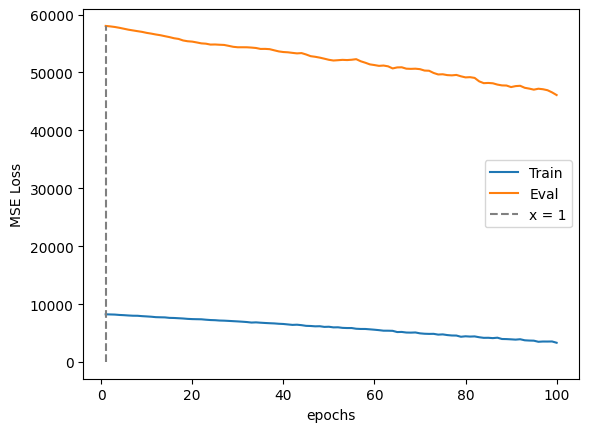

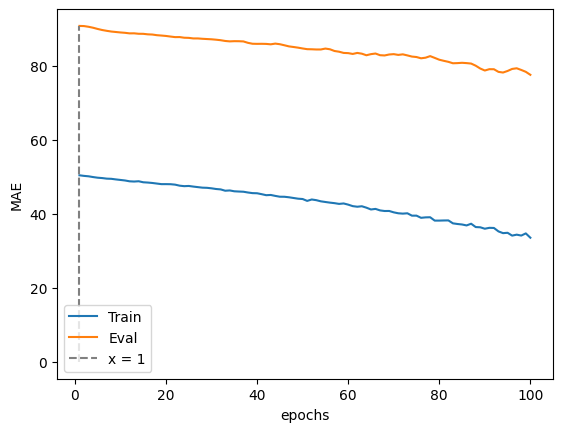

Epoch 001: | Train Loss: 8694.65877 | Val Loss: 18337.31250 | Train Acc: 52.539| Val Acc: 58.507
Epoch 002: | Train Loss: 8646.23136 | Val Loss: 18312.23633 | Train Acc: 52.321| Val Acc: 58.479
Epoch 003: | Train Loss: 8613.34318 | Val Loss: 18251.56641 | Train Acc: 52.218| Val Acc: 58.342
Epoch 004: | Train Loss: 8557.65706 | Val Loss: 18174.51562 | Train Acc: 52.055| Val Acc: 58.082
Epoch 005: | Train Loss: 8521.19979 | Val Loss: 18100.17383 | Train Acc: 51.938| Val Acc: 57.904
Epoch 006: | Train Loss: 8462.93563 | Val Loss: 18033.98047 | Train Acc: 51.811| Val Acc: 57.671
Epoch 007: | Train Loss: 8435.97884 | Val Loss: 17963.62695 | Train Acc: 51.692| Val Acc: 57.548
Epoch 008: | Train Loss: 8352.42399 | Val Loss: 17900.99219 | Train Acc: 51.481| Val Acc: 57.411
Epoch 009: | Train Loss: 8299.88786 | Val Loss: 17841.57227 | Train Acc: 51.417| Val Acc: 57.329
Epoch 010: | Train Loss: 8230.38241 | Val Loss: 17784.13086 | Train Acc: 51.226| Val Acc: 57.205
Epoch 011: | Train Loss: 8220.

Epoch 086: | Train Loss: 4364.61239 | Val Loss: 14946.94141 | Train Acc: 38.913| Val Acc: 52.384
Epoch 087: | Train Loss: 4374.09635 | Val Loss: 14815.55273 | Train Acc: 39.025| Val Acc: 51.918
Epoch 088: | Train Loss: 4325.27881 | Val Loss: 14647.66797 | Train Acc: 38.333| Val Acc: 51.795
Epoch 089: | Train Loss: 4182.03060 | Val Loss: 14823.10059 | Train Acc: 37.770| Val Acc: 51.973
Epoch 090: | Train Loss: 4166.44954 | Val Loss: 14751.27539 | Train Acc: 37.496| Val Acc: 51.822
Epoch 091: | Train Loss: 4045.30037 | Val Loss: 14638.46191 | Train Acc: 37.333| Val Acc: 51.260
Epoch 092: | Train Loss: 4047.38139 | Val Loss: 14454.12891 | Train Acc: 37.239| Val Acc: 50.932
Epoch 093: | Train Loss: 3897.21212 | Val Loss: 14572.65039 | Train Acc: 36.614| Val Acc: 51.521
Epoch 094: | Train Loss: 3986.06014 | Val Loss: 14598.58008 | Train Acc: 36.893| Val Acc: 51.712
Epoch 095: | Train Loss: 3876.86515 | Val Loss: 14621.49609 | Train Acc: 36.720| Val Acc: 51.493
Epoch 096: | Train Loss: 3749.

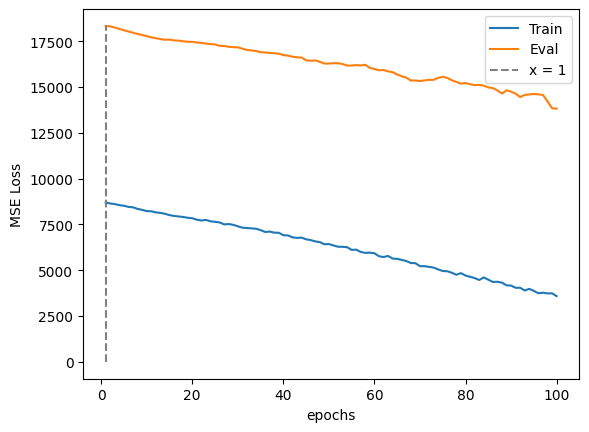

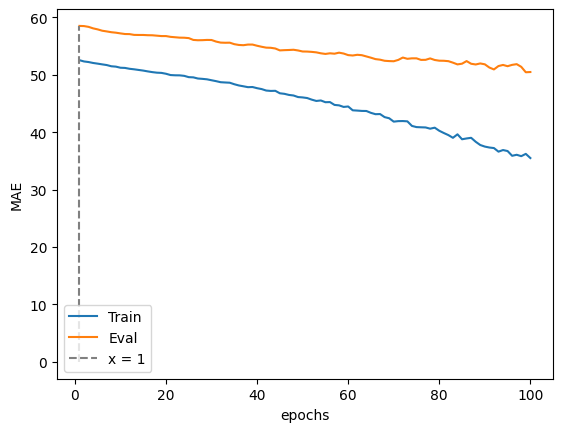

MAE on train set:  34.42872260015117
min prediction: 0
max prediction: 133

MAE on test set:  56.18775510204082
Error <= 30: 65.03 %
min prediction: 0
max prediction: 129


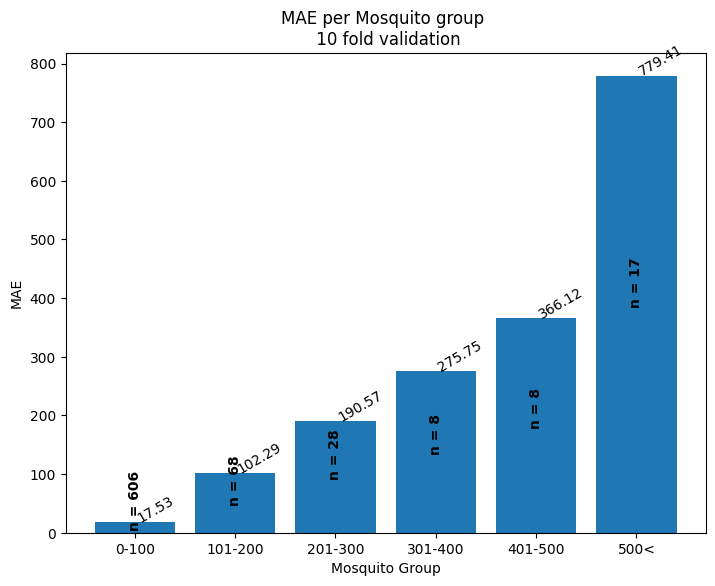

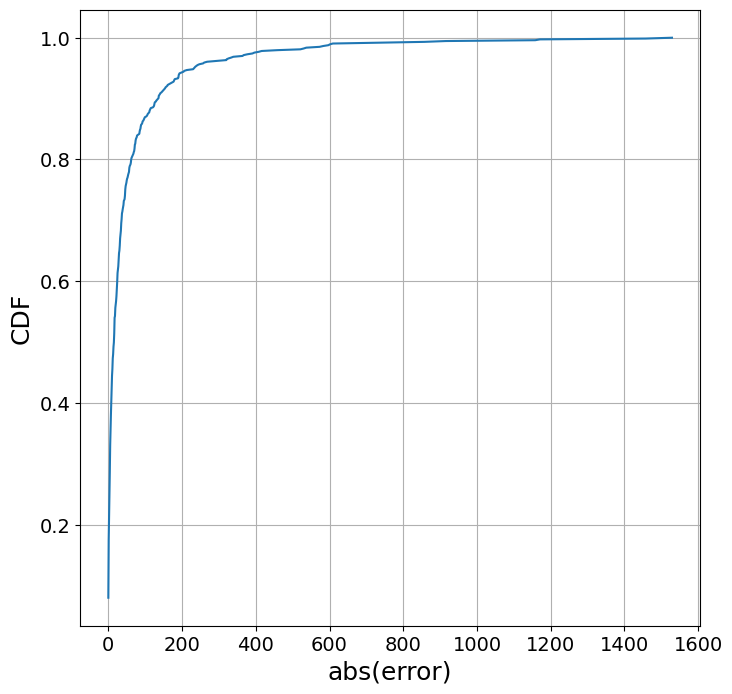

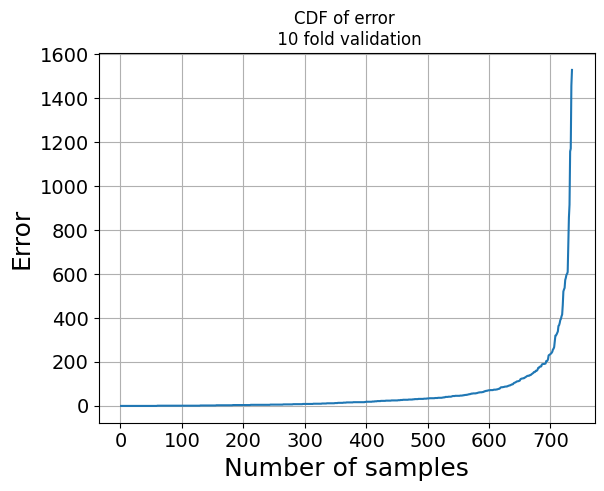

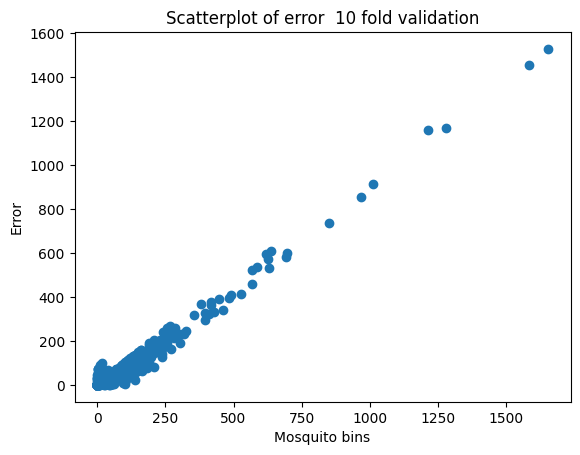

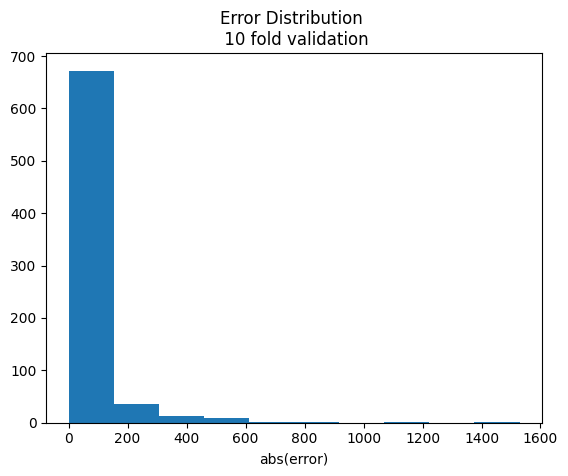

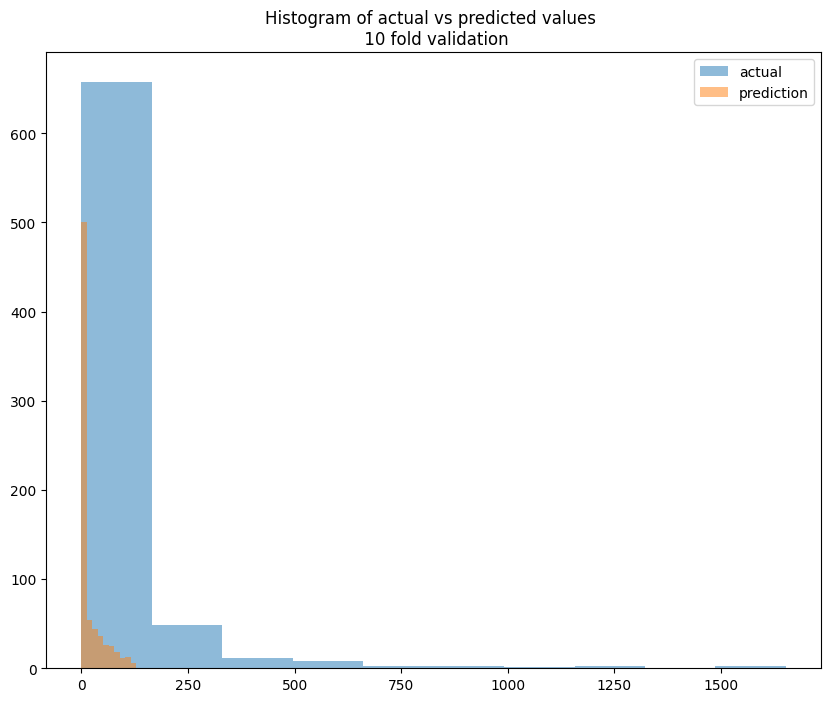

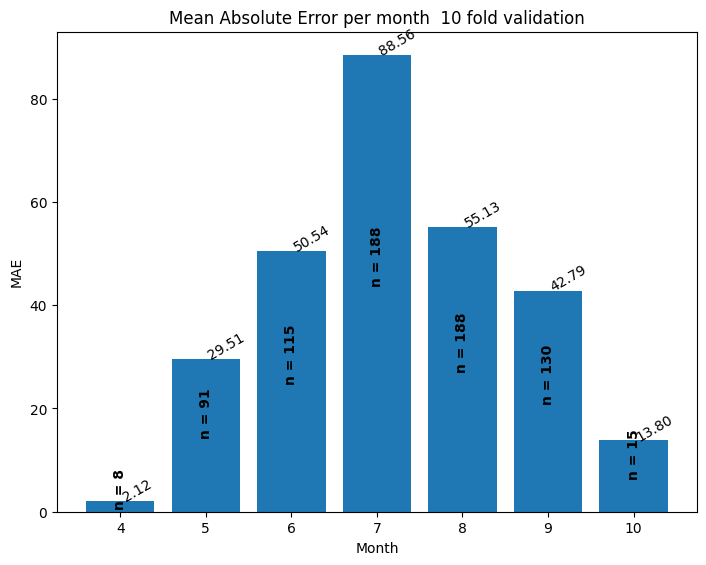

In [9]:
train_model_KFold(data, model, date_col='dt_placement', case='')

Epoch 001: | Train Loss: 6881.30586 | Val Loss: 84.30445 | Train Acc: 45.067| Val Acc: 6.538
Epoch 002: | Train Loss: 6863.30820 | Val Loss: 87.54179 | Train Acc: 45.012| Val Acc: 6.462
Epoch 003: | Train Loss: 6826.64629 | Val Loss: 88.11178 | Train Acc: 44.865| Val Acc: 6.538
Epoch 004: | Train Loss: 6782.11904 | Val Loss: 88.91528 | Train Acc: 44.705| Val Acc: 6.692
Epoch 005: | Train Loss: 6752.15371 | Val Loss: 89.40815 | Train Acc: 44.607| Val Acc: 6.692
Epoch 006: | Train Loss: 6716.98428 | Val Loss: 89.38020 | Train Acc: 44.522| Val Acc: 6.692
Epoch 007: | Train Loss: 6672.43574 | Val Loss: 89.89771 | Train Acc: 44.350| Val Acc: 6.769
Epoch 008: | Train Loss: 6634.02178 | Val Loss: 90.36960 | Train Acc: 44.220| Val Acc: 6.769
Epoch 009: | Train Loss: 6558.67324 | Val Loss: 90.51733 | Train Acc: 44.097| Val Acc: 6.769
Epoch 010: | Train Loss: 6546.54033 | Val Loss: 90.55875 | Train Acc: 43.939| Val Acc: 6.692
Epoch 011: | Train Loss: 6487.81387 | Val Loss: 90.48502 | Train Acc: 

Epoch 090: | Train Loss: 3646.60601 | Val Loss: 93.25162 | Train Acc: 34.332| Val Acc: 7.308
Epoch 091: | Train Loss: 3636.11279 | Val Loss: 100.68175 | Train Acc: 34.287| Val Acc: 7.385
Epoch 092: | Train Loss: 3580.64126 | Val Loss: 102.09447 | Train Acc: 34.132| Val Acc: 7.538
Epoch 093: | Train Loss: 3618.87441 | Val Loss: 95.74215 | Train Acc: 34.197| Val Acc: 7.154
Epoch 094: | Train Loss: 3540.08169 | Val Loss: 100.21857 | Train Acc: 33.685| Val Acc: 7.615
Epoch 095: | Train Loss: 3494.92383 | Val Loss: 102.60395 | Train Acc: 34.020| Val Acc: 7.615
Epoch 096: | Train Loss: 3492.28535 | Val Loss: 102.09241 | Train Acc: 33.689| Val Acc: 7.769
Epoch 097: | Train Loss: 3439.64497 | Val Loss: 110.76125 | Train Acc: 33.456| Val Acc: 8.077
Epoch 098: | Train Loss: 3337.84023 | Val Loss: 113.08910 | Train Acc: 33.146| Val Acc: 8.154
Epoch 099: | Train Loss: 3393.85151 | Val Loss: 102.11655 | Train Acc: 33.407| Val Acc: 7.846
Epoch 100: | Train Loss: 3325.46963 | Val Loss: 93.00056 | Tra

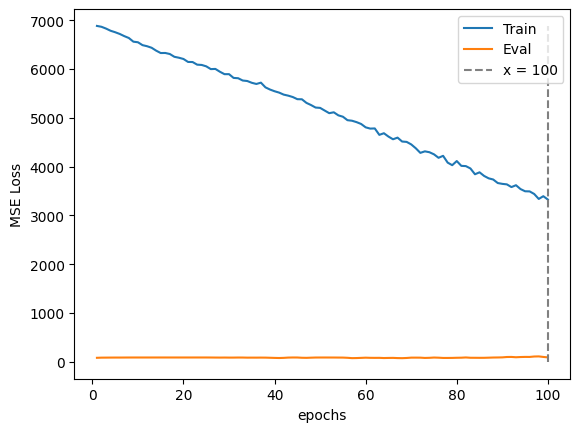

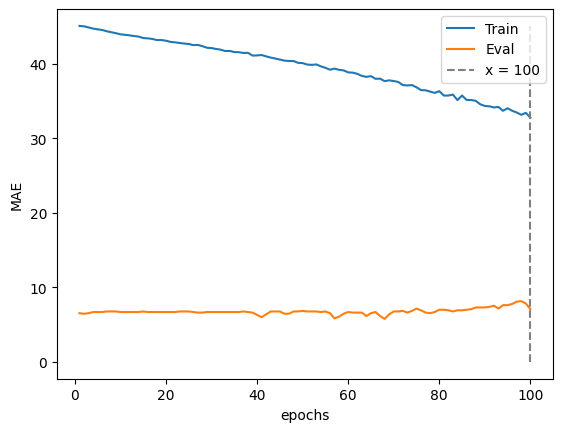

Epoch 001: | Train Loss: 3220.12705 | Val Loss: 20443.14648 | Train Acc: 31.977| Val Acc: 83.031
Epoch 002: | Train Loss: 3155.12388 | Val Loss: 20937.33203 | Train Acc: 31.591| Val Acc: 84.219
Epoch 003: | Train Loss: 3060.16826 | Val Loss: 21175.05078 | Train Acc: 31.190| Val Acc: 84.812
Epoch 004: | Train Loss: 3048.86519 | Val Loss: 21144.60547 | Train Acc: 31.104| Val Acc: 84.812
Epoch 005: | Train Loss: 2995.67363 | Val Loss: 21233.12695 | Train Acc: 31.070| Val Acc: 85.156
Epoch 006: | Train Loss: 3007.89917 | Val Loss: 21241.02344 | Train Acc: 31.009| Val Acc: 85.281
Epoch 007: | Train Loss: 2927.09863 | Val Loss: 21246.34375 | Train Acc: 30.731| Val Acc: 85.312
Epoch 008: | Train Loss: 2938.40776 | Val Loss: 21160.55078 | Train Acc: 30.828| Val Acc: 85.156
Epoch 009: | Train Loss: 2938.98770 | Val Loss: 21261.58984 | Train Acc: 30.633| Val Acc: 85.562
Epoch 010: | Train Loss: 2863.35557 | Val Loss: 21324.78906 | Train Acc: 30.346| Val Acc: 85.688
Epoch 011: | Train Loss: 2815.

Epoch 087: | Train Loss: 785.62444 | Val Loss: 19438.51953 | Train Acc: 17.140| Val Acc: 80.906
Epoch 088: | Train Loss: 767.98344 | Val Loss: 19653.92773 | Train Acc: 16.661| Val Acc: 81.031
Epoch 089: | Train Loss: 797.62684 | Val Loss: 19674.65234 | Train Acc: 16.823| Val Acc: 80.938
Epoch 090: | Train Loss: 799.28053 | Val Loss: 19542.45508 | Train Acc: 16.995| Val Acc: 80.594
Epoch 091: | Train Loss: 730.14122 | Val Loss: 19400.28320 | Train Acc: 16.353| Val Acc: 80.188
Epoch 092: | Train Loss: 701.04909 | Val Loss: 19473.55273 | Train Acc: 16.335| Val Acc: 80.000
Epoch 093: | Train Loss: 688.36823 | Val Loss: 19612.97852 | Train Acc: 15.533| Val Acc: 80.438
Epoch 094: | Train Loss: 710.71928 | Val Loss: 19472.06250 | Train Acc: 16.277| Val Acc: 80.281
Epoch 095: | Train Loss: 718.21954 | Val Loss: 19440.97656 | Train Acc: 16.231| Val Acc: 80.062
Epoch 096: | Train Loss: 646.89070 | Val Loss: 19669.05078 | Train Acc: 15.579| Val Acc: 80.844
Epoch 097: | Train Loss: 687.42088 | Val

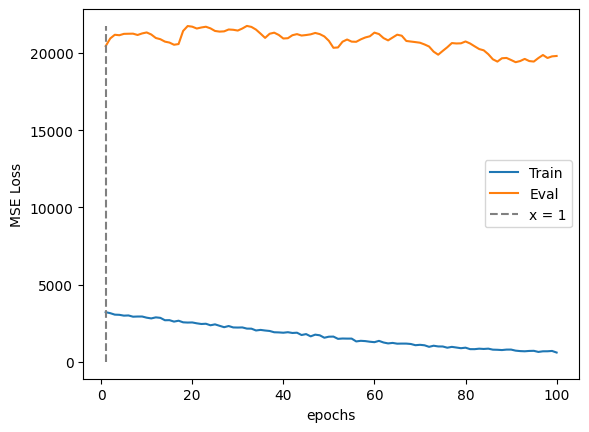

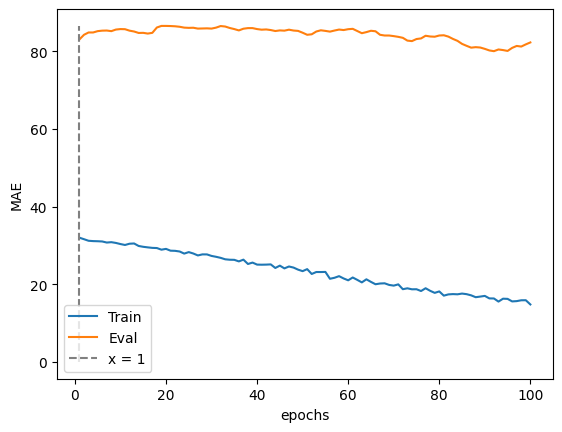

Epoch 001: | Train Loss: 1143.66007 | Val Loss: 13596.34375 | Train Acc: 19.752| Val Acc: 74.654
Epoch 002: | Train Loss: 1028.60505 | Val Loss: 13313.91797 | Train Acc: 18.555| Val Acc: 77.962
Epoch 003: | Train Loss: 976.97690 | Val Loss: 13186.96875 | Train Acc: 19.101| Val Acc: 79.808
Epoch 004: | Train Loss: 855.68925 | Val Loss: 13060.88574 | Train Acc: 18.042| Val Acc: 80.769
Epoch 005: | Train Loss: 1044.90897 | Val Loss: 12916.69727 | Train Acc: 18.731| Val Acc: 81.000
Epoch 006: | Train Loss: 852.08725 | Val Loss: 12738.28223 | Train Acc: 17.543| Val Acc: 79.423
Epoch 007: | Train Loss: 1002.42480 | Val Loss: 12572.04883 | Train Acc: 18.139| Val Acc: 78.962
Epoch 008: | Train Loss: 797.40191 | Val Loss: 12576.62305 | Train Acc: 16.909| Val Acc: 81.038
Epoch 009: | Train Loss: 777.54874 | Val Loss: 12607.84277 | Train Acc: 17.334| Val Acc: 82.962
Epoch 010: | Train Loss: 770.50097 | Val Loss: 12788.67090 | Train Acc: 16.933| Val Acc: 84.654
Epoch 011: | Train Loss: 812.39640 |

Epoch 090: | Train Loss: 396.74456 | Val Loss: 14381.40527 | Train Acc: 12.773| Val Acc: 93.808
Epoch 091: | Train Loss: 452.27473 | Val Loss: 13499.63477 | Train Acc: 13.629| Val Acc: 88.077
Epoch 092: | Train Loss: 447.79499 | Val Loss: 13338.55762 | Train Acc: 14.030| Val Acc: 86.192
Epoch 093: | Train Loss: 448.61501 | Val Loss: 13635.63672 | Train Acc: 13.764| Val Acc: 87.077
Epoch 094: | Train Loss: 431.00306 | Val Loss: 13798.77734 | Train Acc: 13.621| Val Acc: 87.577
Epoch 095: | Train Loss: 425.51932 | Val Loss: 13662.92285 | Train Acc: 13.406| Val Acc: 87.500
Epoch 096: | Train Loss: 399.46904 | Val Loss: 13349.99902 | Train Acc: 12.825| Val Acc: 87.000
Epoch 097: | Train Loss: 439.85387 | Val Loss: 13592.57812 | Train Acc: 13.178| Val Acc: 89.192
Epoch 098: | Train Loss: 424.54595 | Val Loss: 13707.81738 | Train Acc: 13.354| Val Acc: 89.269
Epoch 099: | Train Loss: 410.57070 | Val Loss: 13647.03516 | Train Acc: 13.092| Val Acc: 88.308
Epoch 100: | Train Loss: 434.13184 | Val

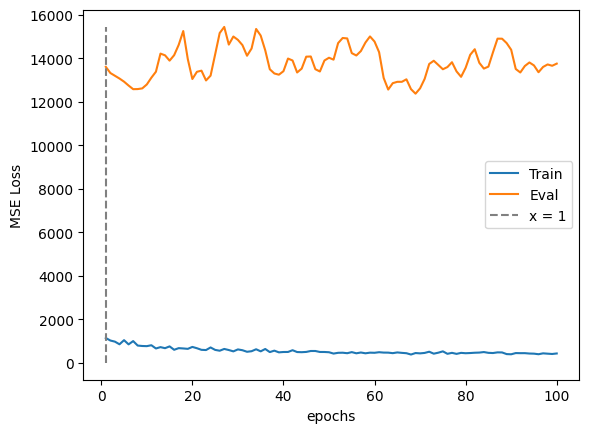

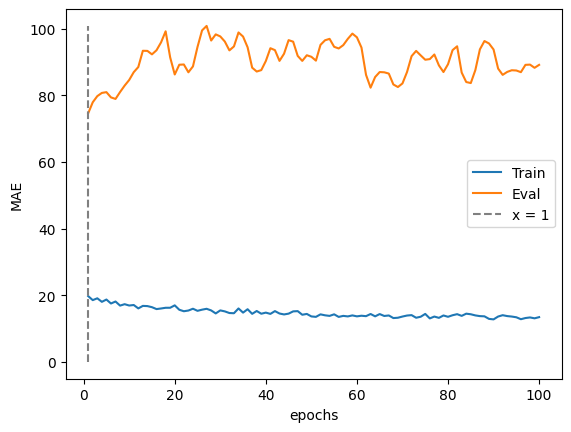

Epoch 001: | Train Loss: 800.28661 | Val Loss: 16529.54102 | Train Acc: 15.993| Val Acc: 84.259
Epoch 002: | Train Loss: 700.16746 | Val Loss: 15907.35254 | Train Acc: 15.928| Val Acc: 79.111
Epoch 003: | Train Loss: 721.32161 | Val Loss: 16009.05566 | Train Acc: 16.165| Val Acc: 78.852
Epoch 004: | Train Loss: 497.67723 | Val Loss: 15954.06738 | Train Acc: 14.239| Val Acc: 80.333
Epoch 005: | Train Loss: 574.71797 | Val Loss: 15690.66406 | Train Acc: 15.162| Val Acc: 80.333
Epoch 006: | Train Loss: 583.78012 | Val Loss: 15373.02051 | Train Acc: 15.393| Val Acc: 79.296
Epoch 007: | Train Loss: 526.75741 | Val Loss: 15125.23535 | Train Acc: 14.720| Val Acc: 77.852
Epoch 008: | Train Loss: 551.54302 | Val Loss: 15059.50488 | Train Acc: 14.416| Val Acc: 77.296
Epoch 009: | Train Loss: 516.16447 | Val Loss: 15350.10840 | Train Acc: 14.431| Val Acc: 80.148
Epoch 010: | Train Loss: 476.01880 | Val Loss: 15534.22949 | Train Acc: 14.065| Val Acc: 80.593
Epoch 011: | Train Loss: 504.53212 | Val

Epoch 087: | Train Loss: 358.89109 | Val Loss: 15778.55566 | Train Acc: 12.702| Val Acc: 76.630
Epoch 088: | Train Loss: 333.04789 | Val Loss: 16021.77246 | Train Acc: 11.756| Val Acc: 76.556
Epoch 089: | Train Loss: 404.33736 | Val Loss: 16225.66016 | Train Acc: 12.631| Val Acc: 78.370
Epoch 090: | Train Loss: 365.89047 | Val Loss: 16369.32129 | Train Acc: 12.284| Val Acc: 79.778
Epoch 091: | Train Loss: 376.21983 | Val Loss: 16632.04688 | Train Acc: 12.246| Val Acc: 80.630
Epoch 092: | Train Loss: 322.45249 | Val Loss: 16425.55859 | Train Acc: 11.888| Val Acc: 79.148
Epoch 093: | Train Loss: 393.07035 | Val Loss: 16132.79883 | Train Acc: 12.925| Val Acc: 77.926
Epoch 094: | Train Loss: 383.52024 | Val Loss: 16051.62695 | Train Acc: 12.342| Val Acc: 77.963
Epoch 095: | Train Loss: 278.72961 | Val Loss: 16116.46680 | Train Acc: 10.924| Val Acc: 79.407
Epoch 096: | Train Loss: 425.85252 | Val Loss: 16291.32617 | Train Acc: 12.978| Val Acc: 80.148
Epoch 097: | Train Loss: 315.63674 | Val

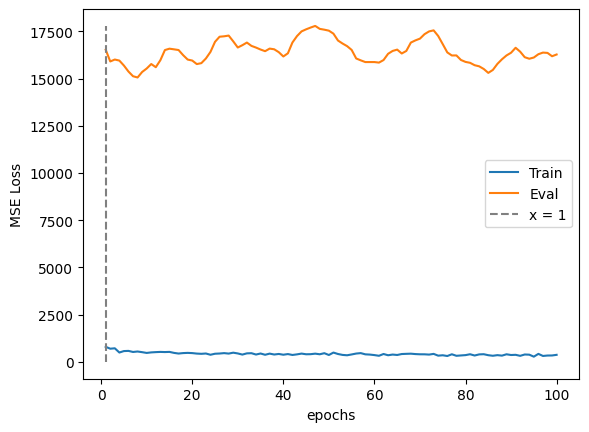

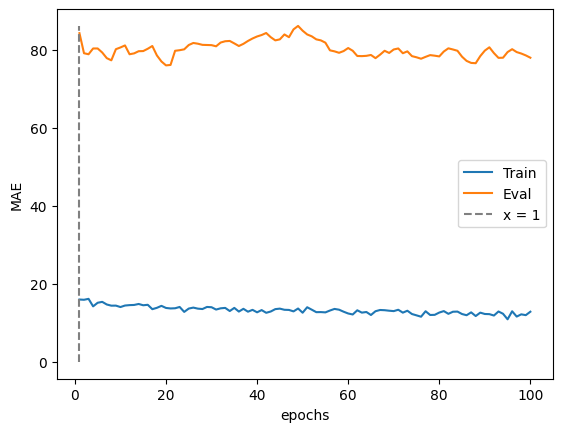

Epoch 001: | Train Loss: 931.60781 | Val Loss: 57117.09375 | Train Acc: 17.405| Val Acc: 128.417
Epoch 002: | Train Loss: 900.69351 | Val Loss: 56676.00391 | Train Acc: 17.382| Val Acc: 130.833
Epoch 003: | Train Loss: 809.50010 | Val Loss: 58489.14453 | Train Acc: 17.034| Val Acc: 136.167
Epoch 004: | Train Loss: 850.37902 | Val Loss: 60489.46875 | Train Acc: 16.939| Val Acc: 139.833
Epoch 005: | Train Loss: 711.98575 | Val Loss: 60794.90625 | Train Acc: 16.574| Val Acc: 141.000
Epoch 006: | Train Loss: 691.90467 | Val Loss: 60556.41016 | Train Acc: 15.944| Val Acc: 142.417
Epoch 007: | Train Loss: 727.59291 | Val Loss: 58975.50391 | Train Acc: 16.309| Val Acc: 141.167
Epoch 008: | Train Loss: 693.62795 | Val Loss: 57973.81250 | Train Acc: 16.414| Val Acc: 140.250
Epoch 009: | Train Loss: 743.62196 | Val Loss: 59422.19922 | Train Acc: 16.593| Val Acc: 141.500
Epoch 010: | Train Loss: 635.54754 | Val Loss: 60300.22266 | Train Acc: 15.926| Val Acc: 142.500
Epoch 011: | Train Loss: 649.6

Epoch 089: | Train Loss: 471.74919 | Val Loss: 62516.47266 | Train Acc: 14.751| Val Acc: 147.417
Epoch 090: | Train Loss: 468.35746 | Val Loss: 62864.60547 | Train Acc: 14.480| Val Acc: 148.167
Epoch 091: | Train Loss: 409.71993 | Val Loss: 63176.08203 | Train Acc: 13.673| Val Acc: 148.667
Epoch 092: | Train Loss: 489.77783 | Val Loss: 62484.36328 | Train Acc: 14.483| Val Acc: 148.333
Epoch 093: | Train Loss: 453.12577 | Val Loss: 62106.95312 | Train Acc: 14.303| Val Acc: 147.917
Epoch 094: | Train Loss: 401.88966 | Val Loss: 61821.89062 | Train Acc: 13.303| Val Acc: 148.333
Epoch 095: | Train Loss: 464.80811 | Val Loss: 62073.80078 | Train Acc: 14.642| Val Acc: 149.417
Epoch 096: | Train Loss: 425.97029 | Val Loss: 62403.58984 | Train Acc: 13.806| Val Acc: 149.833
Epoch 097: | Train Loss: 439.63726 | Val Loss: 63183.77734 | Train Acc: 14.269| Val Acc: 150.667
Epoch 098: | Train Loss: 439.17586 | Val Loss: 63217.79688 | Train Acc: 14.403| Val Acc: 150.000
Epoch 099: | Train Loss: 440.0

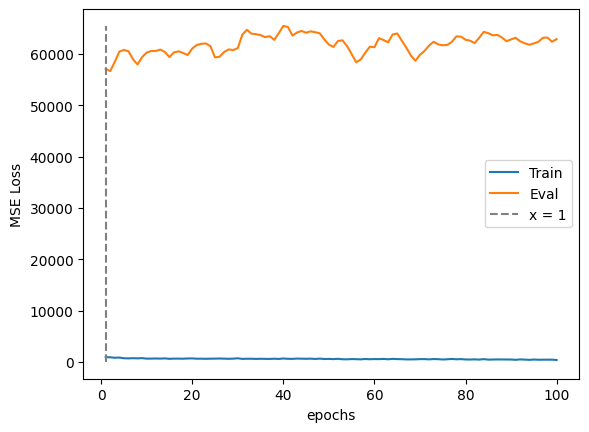

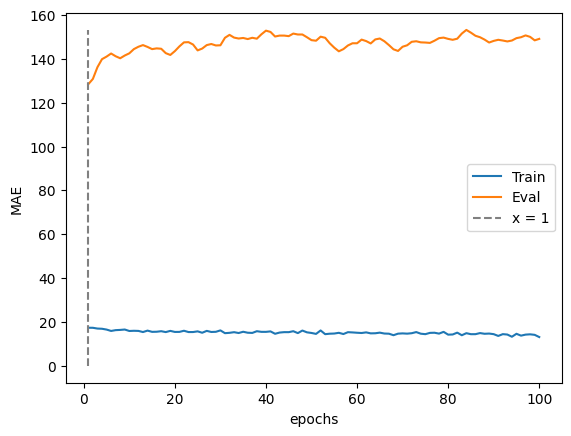

MAE on train set:  13.17810262529833
min prediction: 0
max prediction: 271

MAE on test set:  81.24545454545455
Error <= 30: 45.45 %
min prediction: 0
max prediction: 276


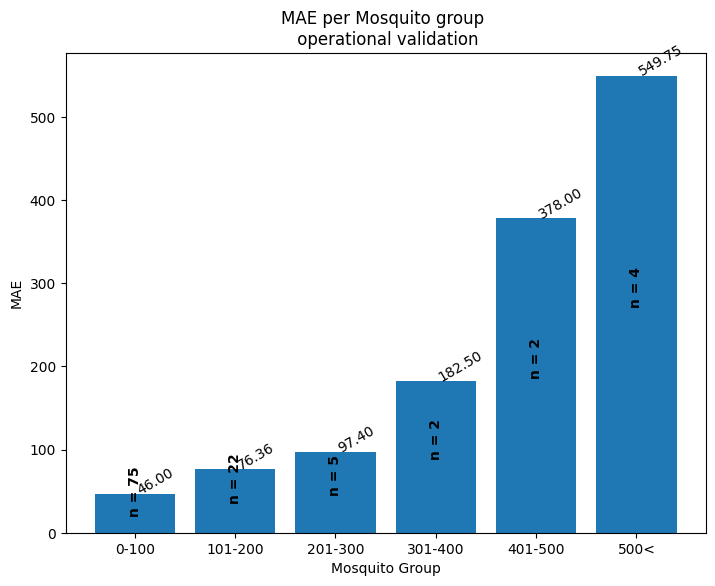

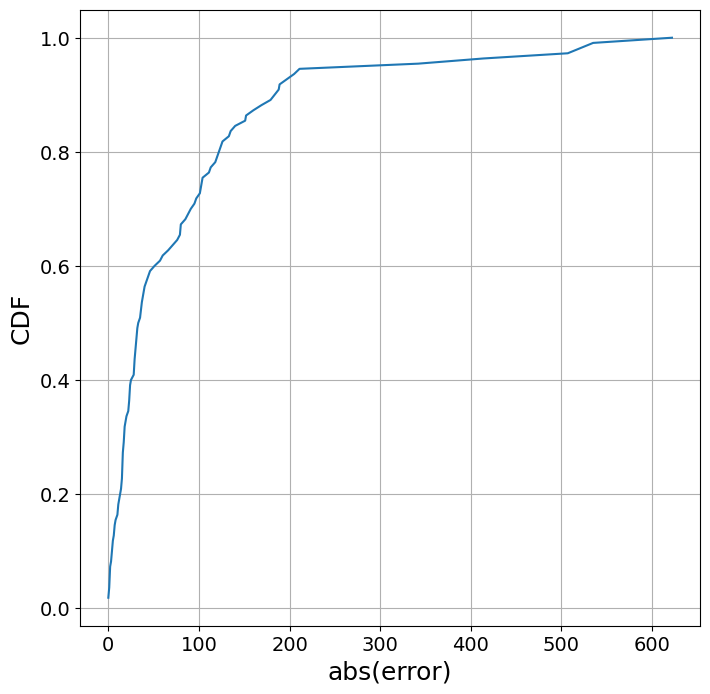

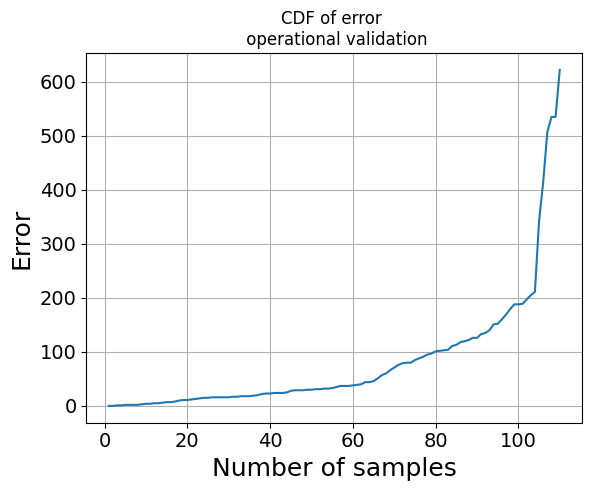

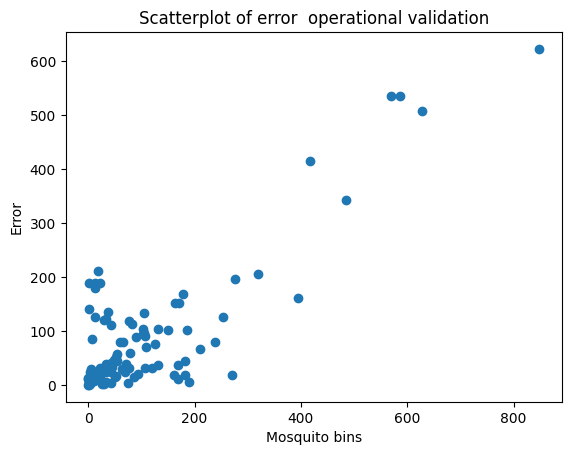

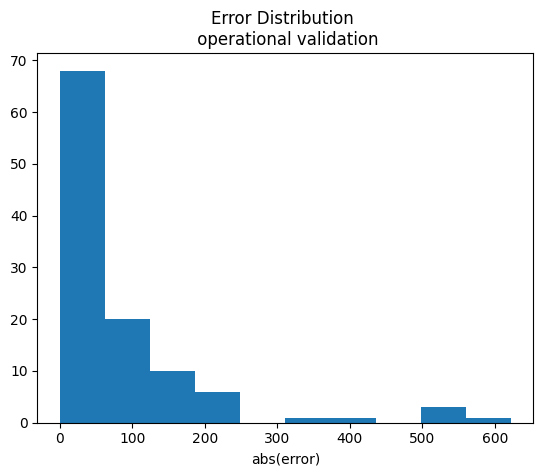

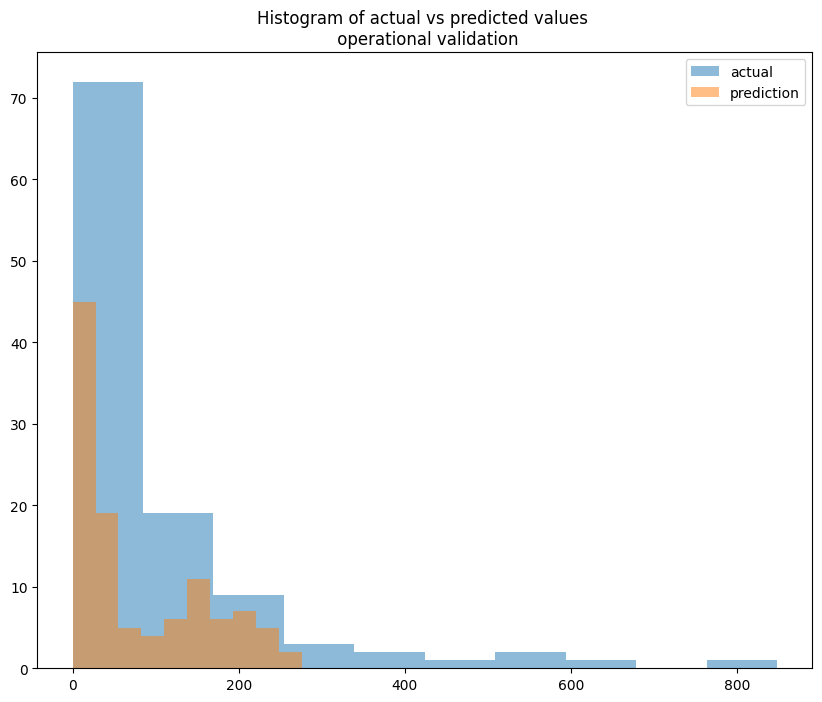

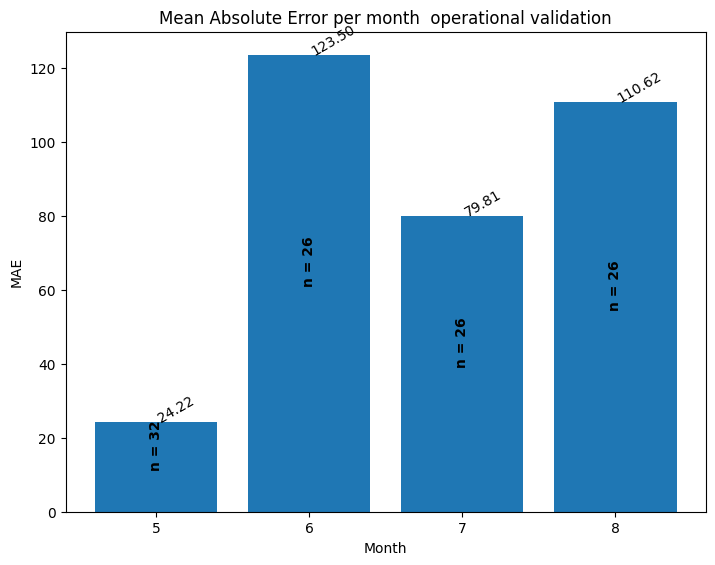

In [10]:
operational_validation(data, model, date='2022-01-01', filepath ='', date_col='dt_placement', case='', fi=False, export=False)